In [171]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import sklearn.metrics as metrics
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

## 4.6.1 The Stock Market Data

In [160]:
df = pd.read_csv('smarket.csv')
smarket_dat = df.drop(df.columns[0], axis=1)
smarket_dat['Direction'] = smarket_dat['Direction'].map({'Up': 1, 'Down': 0})
smarket_dat.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,2001,0.381,-0.192,-2.624,-1.055,5.010,1.1913,0.959,1
1,2001,0.959,0.381,-0.192,-2.624,-1.055,1.2965,1.032,1
2,2001,1.032,0.959,0.381,-0.192,-2.624,1.4112,-0.623,0
3,2001,-0.623,1.032,0.959,0.381,-0.192,1.2760,0.614,1
4,2001,0.614,-0.623,1.032,0.959,0.381,1.2057,0.213,1


In [161]:
smarket_dat.describe()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
count,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.00000,1250.000000,1250.000000,1250.000000
mean,2003.016000,0.003834,0.003919,0.001716,0.001636,0.00561,1.478305,0.003138,0.518400
std,1.409018,1.136299,1.136280,1.138703,1.138774,1.14755,0.360357,1.136334,0.499861
min,2001.000000,-4.922000,-4.922000,-4.922000,-4.922000,-4.92200,0.356070,-4.922000,0.000000
25%,2002.000000,-0.639500,-0.639500,-0.640000,-0.640000,-0.64000,1.257400,-0.639500,0.000000
50%,2003.000000,0.039000,0.039000,0.038500,0.038500,0.03850,1.422950,0.038500,1.000000
75%,2004.000000,0.596750,0.596750,0.596750,0.596750,0.59700,1.641675,0.596750,1.000000
max,2005.000000,5.733000,5.733000,5.733000,5.733000,5.73300,3.152470,5.733000,1.000000


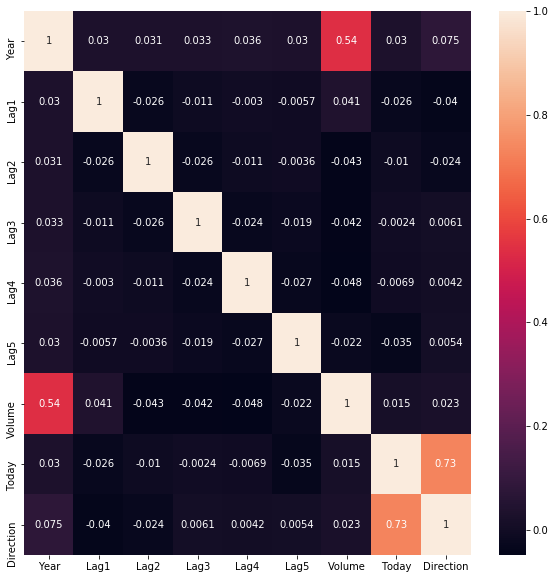

In [162]:
_, ax = plt.subplots(figsize=(10,10))
sns.heatmap(smarket_dat.corr(), annot=True, ax=ax)

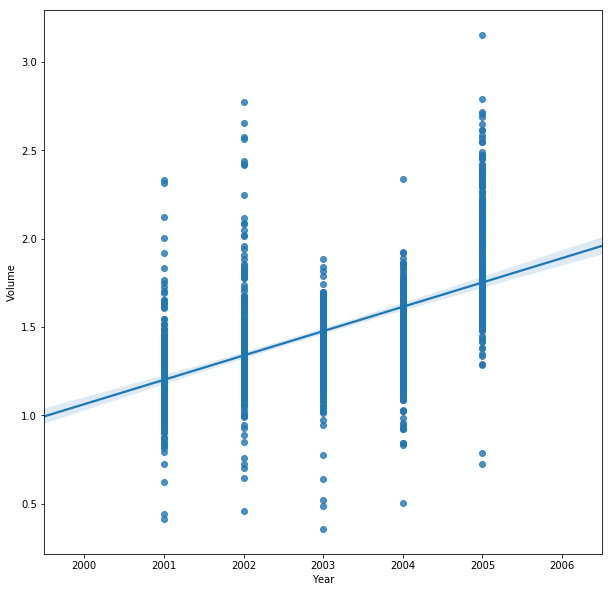

In [163]:
_, ax = plt.subplots(figsize=(10,10))
sns.regplot(ax=ax, x='Year', y='Volume', data=smarket_dat)

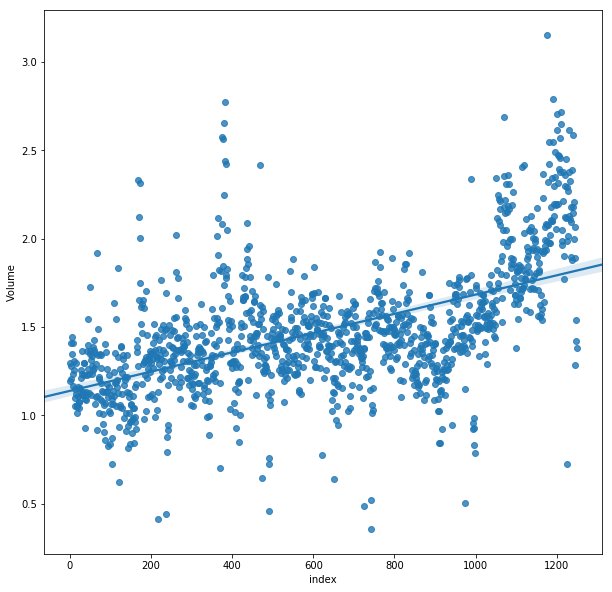

In [164]:
fig, ax = plt.subplots(figsize=(10,10))
sns.regplot(ax=ax, x='index', y='Volume', data=smarket_dat.reset_index())

## 4.6.2 Logistic Regression

In [165]:
logit_model = smf.logit(formula='Direction ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + Volume', data=smarket_dat).fit()
logit_model.summary()

Optimization terminated successfully.
         Current function value: 0.691034
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Direction   No. Observations:                 1250
Model:                          Logit   Df Residuals:                     1243
Method:                           MLE   Df Model:                            6
Date:                Wed, 19 Sep 2018   Pseudo R-squ.:                0.002074
Time:                        17:58:15   Log-Likelihood:                -863.79
converged:                       True   LL-Null:                       -865.59
                                        LLR p-value:                    0.7319
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1260      0.241     -0.523      0.601      -0.598       0.346
Lag1          -0.0731      0.050     -1.457      0.145      -0.171       0.025
Lag2          -0.0423      0.050     -0.845      0.398      -0.140       0.056
Lag3           0.0111      0.050      0.222      0.824      -0.087       0.109
Lag4           0.0094      0.050      0.187      0.851      -0.089       0.107
Lag5           0.0103      0.050      0.208      0.835      -0.087       0.107
Volume         0.1354      0.158      0.855      0.392      -0.175       0.446
==============================================================================
"""

In [166]:
pred = logit_model.predict(smarket_dat).map(lambda x: 1 if x > 0.5 else 0)
conf_mtrx = metrics.confusion_matrix(smarket_dat['Direction'], pred)
pd.DataFrame(conf_mtrx, columns=['Down', 'Up'], index= ['Down', 'Up']).T

,Down,Up
Down,145,141
Up,457,507


In [109]:
(145 + 507) / (145 + 141 + 457 + 507)

0.5216

In [113]:
(pred == smarket_dat['Direction']).sum() / smarket_dat.shape[0]

0.5216

In [116]:
(pred == smarket_dat['Direction']).mean()

0.5216

In [167]:
year_mask = smarket_dat['Year'] < 2005
pre = smarket_dat[year_mask]
post = smarket_dat[year_mask == False]

logit_model = smf.logit(formula='Direction ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + Volume', data=pre).fit()
pred = logit_model.predict(post).map(lambda x: 1 if x > 0.5 else 0)
conf_mtrx = metrics.confusion_matrix(post['Direction'], pred)
pd.DataFrame(conf_mtrx, columns=['Down', 'Up'], index= ['Down', 'Up']).T

Optimization terminated successfully.
         Current function value: 0.691936
         Iterations 4


,Down,Up
Down,77,97
Up,34,44


In [148]:
(pred == post['Direction']).mean()

0.4801587301587302

In [168]:
year_mask = smarket_dat['Year'] < 2005
pre = smarket_dat[year_mask]
post = smarket_dat[year_mask == False]

logit_model = smf.logit(formula='Direction ~ Lag1 + Lag2', data=pre).fit()
pred = logit_model.predict(post).map(lambda x: 1 if x > 0.5 else 0)
conf_mtrx = metrics.confusion_matrix(post['Direction'], pred)
pd.DataFrame(conf_mtrx, columns=['Down', 'Up'], index= ['Down', 'Up']).T

Optimization terminated successfully.
         Current function value: 0.692085
         Iterations 3


,Down,Up
Down,35,35
Up,76,106


In [169]:
(pred == post['Direction']).mean()

0.5595238095238095

In [170]:
logit_model.predict(pd.DataFrame({'Lag1' : [1.2, 1.5], 'Lag2' : [1.1, -0.8]}))

0    0.479146
1    0.496094
dtype: float64

## 4.6.3 Linear Discriminant Analysis

In [195]:
lda = LinearDiscriminantAnalysis()
lda.fit(pre[['Lag1', 'Lag2']], pre['Direction'])

# Group means
pd.DataFrame(lda.means_, columns=['Lag1', 'Lag2'], index=['Down', 'Up'])

,Lag1,Lag2
Down,0.042790,0.033894
Up,-0.039546,-0.031325


In [207]:
# Priors
pd.DataFrame(lda.priors_, index= ['Down', 'Up'], columns=['Prior'])

,Prior
Down,0.491984
Up,0.508016


In [217]:
# Coefficients - NB: sklearn calls these `scalings`
pd.DataFrame(lda.scalings_, columns=['LD1'], index=['Lag1', 'Lag2'])

,LD1
Lag1,-0.642019
Lag2,-0.513529


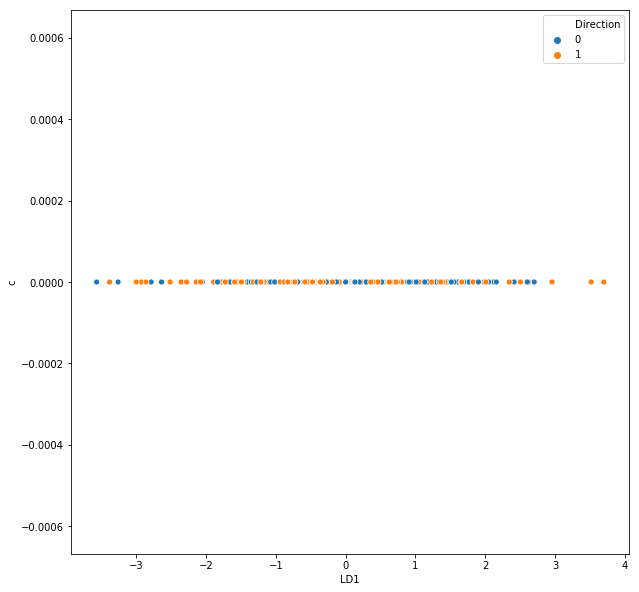

In [310]:
LD1 = pre[['Lag1', 'Lag2']] @ lda.priors_.reshape(2,1)
LD1.columns = ['LD1']
LD1['Direction'] = pre['Direction']
LD1['c'] = 0
_, ax = plt.subplots(figsize=(10,10))
sns.scatterplot('LD1', y='c', data=LD1, hue='Direction', ax=ax)

In [311]:
# Here -> TODO: simulate data for Fisher Discriminant Plot 
# where data classes are clearly seperable